In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Mass on a spring
- Spring is at rest. $z=0$
- Force exerted by spring: $F = -z$
- Considering $F=ma$, $a=\ddot{z}$, $m=1$. The equation of motion is: $\ddot{z} = -z + u$.
- $u$ is the control signal with $-1 < u < 1$
- Problem: Given initial pos and vel, $z_i$ and $\dot{z}_i$ at time $t_i$, find the control path $u(t_i \rightarrow t_f)$ such that $z(t_f)$ is maximal.
- Path cost: $R(x,u,t) = 0$
- End cost: $\phi(x) = C^T x$, with $C^T = (-1, 0)$

In [6]:
# x[0] = z, x[1] = \dot{z}. Then \dot{x} = Ax + Bu
A = np.array([[0, 1], [-1, 0]])
B = np.array([0, 1])

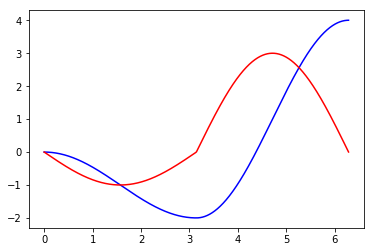

In [23]:
# Optimal control Law:
def opt_control(t):
    less_than_pi = t < np.pi
    return -1*less_than_pi + 1*~less_than_pi


dt = 0.001
Tend = 2*np.pi
T = int(Tend/dt)

ts = np.linspace(0, 2*np.pi, T)
# forward_pass
us = opt_control(ts)

xs = np.zeros((2, T))
dxs = np.zeros_like(xs)
xs[0] = 0
for ii in range(len(ts)-1):
    dxs[:, ii] = A.dot(xs[:, ii]) + B.dot(us[ii])
    xs[:, ii+1] = xs[:, ii] + dxs[:, ii]*dt

plt.plot(ts, xs[0, :], color='blue')
plt.plot(ts, xs[1, :], color='red')
plt.show()